In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import sys 
import os 
path='../../src'
if not path in sys.path:
    sys.path.insert(1,path)
from utils_OB import *
from preposessing import*

%load_ext autoreload
%autoreload 2

In [23]:
files=os.listdir('D:/data_disk/5hz_covssi/')
ts=import_converted_ts('D:/data_disk/5hz_covssi/',files[4])


In [44]:
valid_range= { 'freq': [0, 62.8],'damping': [0,np.inf] }

indicator='freq'
s=5
stabcrit = {'freq':0.99, 'damping': 0.99, 'mac': 0.99}
prob_threshold = 0.95   #probability of pole to belong to 
# cluster, based on estimated "probability" density function

min_cluster_size=50
min_samples=20
scaling={'mac':2, 'lambda_real':2, 'lambda_imag': 1}

In [45]:
ts.find_stable_poles(s,stabcrit,valid_range,indicator)
ts.cluster(prob_threshold,min_cluster_size,min_samples,scaling)

c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
c:\Users\olebj\miniconda3\lib\site-packages\koma\clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling


In [46]:
# print(ts.lambds_n_auto)
fig=PlotStabDiagFromTsObject(ts,display=True,color='damping_abs',true_w=True,xmax=0.45)

test
test2
test3


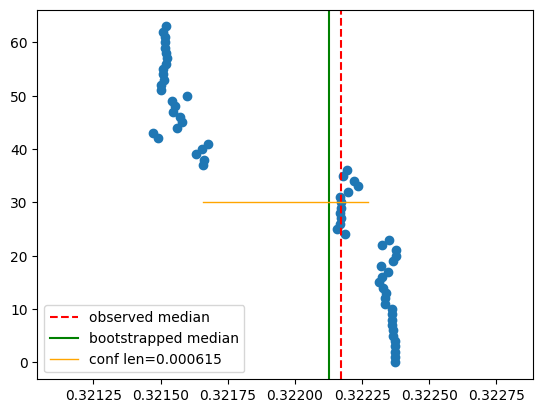

In [6]:
matplotlib.use('module://matplotlib_inline.backend_inline')

i=0

test=ts.lambds_n_auto[i]
# print(test)
plt.scatter(test,range(len(test)))
# plt.xlim(1.3,1.43)
plt.axvline(np.median(test),color='red',linestyle='--',label='observed median')

ts.create_confidence_intervals()

plt.axvline(ts.bs_lambds[i],color='green', label='bootstrapped median')
conf_interval=ts.bs_lambds_confidence[i]
l=conf_interval[1]-conf_interval[0]
plt.plot(conf_interval,[30,30],color='orange',lw=1,label='conf len='+str(np.around(l,6)))
plt.legend()
plt.xlim(conf_interval[0]-l,conf_interval[1]+l)

plt.show()